## <span style="color:#BB0065">Modes of Convergence</span> 
$$ X_n \rightarrow X_o $$

* Convergence almost surely
* Convergence in probability
* Convergence in distribution

![alt text](https://miro.medium.com/max/875/1*7erwXM4J29h6IfzbeNZmaw.png)

### Convergence in Probability

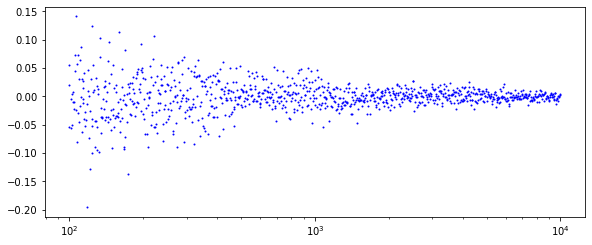

In [2]:
## Example 
# Uniform distribution with mean zero and range between mean-W and mean+W.
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import uniform

np.random.seed(0)

N = (10 ** np.linspace(2, 4, 1000)).astype(int)
mu = 0
W = 2
rng = uniform(mu - 0.5 * W, W) 

mu_estimate_mean = np.zeros(N.shape)

for i in range(len(N)):
    x = rng.rvs(N[i])
    mu_estimate_mean[i] = np.mean(x)

fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0, bottom=0.15, left=0.15)

ax = fig.add_subplot(211, xscale='log')
ax.scatter(N, mu_estimate_mean, c='b', lw=0, s=4)

Obs: The higher the sample size n, the closer the sample mean is to the real parameter, which is equal to zero.

### Convergence in Distribution

A sequence of random variables {Xn} with probability distribution Fn(x) is said to converge in distribution towards X, with probability distribution F(x), if:

$$ \lim_{n \to +\infty} F_n(x) = F(x)$$

and:

$$ X_n \overset{d}\rightarrow  X $$

### Simulation of convergence

In [4]:
import seaborn as sns
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [6]:
# n is used for realized sample size and dist_n is the n of simulated RV's

p = 0.65
n = 10000
dist_n = 100
sample_ = np.array([1 if random.random() <= p else 0 for i in range(n)])
rvs = np.array([[1 if random.random() <= p else 0 for i in range(n)] for j in range(dist_n)])

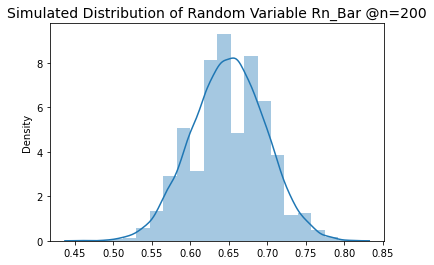

-------------------------------------------------
Rn_Bar converges in distribution to N(0, p(1-p))
(p * (1-p) / n ~= 0.0011)
-------------------------------------------------
               R     RnBar
mean      0.6500  0.649733
variance  0.2275  0.002253

-----------------------------------
Rn_Bar converges in probability to p
-----------------------------------
estimated p: 0.6465


In [7]:
# Convergence of RnBar, the sample mean of a Bernoulli(p = 0.65)

rn_bar_actual = np.mean(sample_)
rn_bar_dist = np.mean(rvs, axis=0)

plt.title('Simulated Distribution of Random Variable Rn_Bar @n=200', fontsize=14)
sns.distplot(rn_bar_dist, bins=20)
plt.show()

print('-------------------------------------------------')
print('Rn_Bar converges in distribution to N(0, p(1-p))')
print(f'(p * (1-p) / n ~= {round(p * (1 - p) / 200, 4)})')
print('-------------------------------------------------')
table = pd.DataFrame({'R': [p, p * (1 - p)], 'RnBar': [np.mean(rn_bar_dist), np.var(rn_bar_dist)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

print('\n-----------------------------------')
print('Rn_Bar converges in probability to p')
print('-----------------------------------')
print(f'estimated p: {rn_bar_actual}')